In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime

In [2]:
from matplotlib import font_manager, rc 

font_name=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name) 

In [3]:
df=pd.read_excel('제공데이터.xlsx', encoding='utf-8')
df.head(5)

,Unnamed: 0,Unnamed: 0.1,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,주문량,월,시간대,시청률,날짜,강수량(mm),공휴일
0,0,0,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,2099000,2,52.606516,1,6,0.0,1,0.0,1
1,1,1,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,4371000,2,109.548872,1,6,0.0,1,0.0,1
2,2,2,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,3262000,2,81.754386,1,6,0.0,1,0.0,1
3,3,3,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,6955000,2,174.310777,1,6,0.0,1,0.0,1
4,4,4,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,6672000,2,167.218045,1,6,0.0,1,0.0,1


In [4]:
del df['Unnamed: 0']
del df['Unnamed: 0.1']

df=df.drop(df[df['취급액']==0].index)

In [5]:
df.describe()

,노출(분),마더코드,상품코드,상품군,판매단가,취급액,요일,주문량,월,시간대,시청률,날짜,강수량(mm),공휴일
count,35379.000000,35379.000000,35379.000000,35379.000000,3.537900e+04,3.537900e+04,35379.000000,35379.000000,35379.000000,35379.000000,35379.000000,35379.000000,35379.000000,35379.000000
mean,20.333277,100394.664886,201228.059046,4.922242,3.878590e+05,2.310241e+07,3.994149,314.797301,6.492298,14.110574,0.004567,15.466322,2.404446,0.050595
std,3.095404,251.968182,739.288622,2.903809,6.264088e+05,2.005790e+07,2.002654,427.826506,3.395820,6.568274,0.008163,8.726040,8.088669,0.219172
min,2.000000,100000.000000,200000.000000,1.000000,1.280000e+04,1.030000e+05,1.000000,1.302349,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,20.000000,100155.000000,200569.000000,3.000000,5.900000e+04,7.998500e+06,2.000000,26.283654,4.000000,9.000000,0.000000,8.000000,0.000000,0.000000
50%,20.000000,100353.000000,201175.000000,4.000000,9.900000e+04,1.732600e+07,4.000000,130.000000,6.000000,15.000000,0.001350,15.000000,0.000000,0.000000
75%,20.000000,100604.000000,201879.000000,7.000000,3.990000e+05,3.276300e+07,6.000000,451.719941,9.000000,20.000000,0.005200,23.000000,0.200000,0.000000
max,40.000000,100849.000000,202513.000000,11.000000,7.930000e+06,3.220090e+08,7.000000,8070.401003,12.000000,23.000000,0.125600,31.000000,63.200000,1.000000


In [6]:
df.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,주문량,월,시간대,시청률,날짜,강수량(mm),공휴일
0,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,2099000,2,52.606516,1,6,0.0,1,0.0,1
1,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,4371000,2,109.548872,1,6,0.0,1,0.0,1
2,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,3262000,2,81.754386,1,6,0.0,1,0.0,1
3,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,6955000,2,174.310777,1,6,0.0,1,0.0,1
4,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,6672000,2,167.218045,1,6,0.0,1,0.0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35379 entries, 0 to 37371
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   방송일시     35379 non-null  datetime64[ns]
 1   노출(분)    35379 non-null  int64         
 2   마더코드     35379 non-null  int64         
 3   상품코드     35379 non-null  int64         
 4   상품명      35379 non-null  object        
 5   상품군      35379 non-null  int64         
 6   판매단가     35379 non-null  int64         
 7   취급액      35379 non-null  int64         
 8   요일       35379 non-null  int64         
 9   주문량      35379 non-null  float64       
 10  월        35379 non-null  int64         
 11  시간대      35379 non-null  int64         
 12  시청률      35379 non-null  float64       
 13  날짜       35379 non-null  int64         
 14  강수량(mm)  35379 non-null  float64       
 15  공휴일      35379 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(11), object(1)
memory usage: 4.6+ MB

In [8]:
df_cor=df.corr()
df_cor.head(5)

,노출(분),마더코드,상품코드,상품군,판매단가,취급액,요일,주문량,월,시간대,시청률,날짜,강수량(mm),공휴일
노출(분),1.000000,0.089634,0.081250,0.102310,0.135079,0.047076,-0.006831,-0.054823,-0.043476,-0.001537,0.020853,-0.009716,0.025915,-0.001857
마더코드,0.089634,1.000000,0.977926,-0.161438,-0.205652,-0.054361,-0.034271,-0.002435,-0.085851,-0.099454,-0.024299,0.017083,-0.012912,-0.038741
상품코드,0.081250,0.977926,1.000000,-0.178119,-0.217107,-0.041807,-0.034529,0.007827,-0.102004,-0.101219,-0.026998,0.012451,-0.017728,-0.036535
상품군,0.102310,-0.161438,-0.178119,1.000000,0.301653,-0.188544,-0.011068,-0.223612,0.107917,0.129404,0.017492,-0.033127,0.033942,0.015953
판매단가,0.135079,-0.205652,-0.217107,0.301653,1.000000,-0.161539,0.064539,-0.369401,-0.044226,0.332901,-0.013635,-0.063044,0.011930,0.045115


In [43]:
#수치형 데이터만
x=df.iloc[:, [1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14]]
y=df.iloc[:, [10]]

In [44]:
#훈련용, 학습용 데이터 나누기
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

랜덤포레스트

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

fr=RandomForestClassifier()
fr.fit(x_train, y_train)

fr_pred=fr.predict(x_test)
accuracy_score(y_test, fr_pred)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.929479932165065

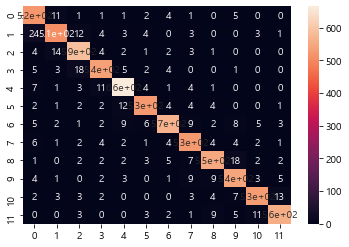

In [12]:
from sklearn.metrics import confusion_matrix

vi=pd.DataFrame(confusion_matrix(y_test, fr_pred))
sns.heatmap(vi, annot=True)

In [13]:
from sklearn.metrics import classification_report
classification_report(fr_pred, y_test)

'              precision    recall  f1-score   support\n\n           1       0.95      0.90      0.92       580\n           2       0.90      0.93      0.92       547\n           3       0.95      0.93      0.94       635\n           4       0.93      0.94      0.94       571\n           5       0.95      0.94      0.95       704\n           6       0.94      0.95      0.95       553\n           7       0.92      0.95      0.93       595\n           8       0.94      0.92      0.93       571\n           9       0.93      0.94      0.93       585\n          10       0.94      0.92      0.93       593\n          11       0.93      0.95      0.94       557\n          12       0.94      0.96      0.95       585\n\n    accuracy                           0.94      7076\n   macro avg       0.94      0.94      0.94      7076\nweighted avg       0.94      0.94      0.94      7076\n'

In [53]:
fr_pred

array([ 9,  4,  3, ...,  7, 11, 11], dtype=int64)

In [15]:
y_test

,월
36022,12
10571,4
6790,3
206,1
14129,5
...,...
19437,7
3883,2
21275,7
31639,11


k-NN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

knn_pred=knn.predict(x_test)
accuracy_score(y_test, knn_pred)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.25381571509327305

의사결정 나무

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

dt_pred=dt.predict(x_test)
accuracy_score(y_test, dt_pred)

0.9460146975692482

In [18]:
dt_pred

array([ 9,  4,  3, ...,  7, 11, 11], dtype=int64)

In [19]:
y_test

,월
36022,12
10571,4
6790,3
206,1
14129,5
...,...
19437,7
3883,2
21275,7
31639,11


AdaBoost

In [20]:
from sklearn.ensemble import AdaBoostClassifier

ab=AdaBoostClassifier()
ab.fit(x_train, y_train)

ab_pred=ab.predict(x_test)
accuracy_score(y_test, ab_pred)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.15842283776144714

XGBoost

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)

gb_pred=gb.predict(x_test)
accuracy_score(y_test, gb_pred)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6129169022046353

나이브베이즈

In [22]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train, y_train)

nb_pred=nb.predict(x_test)
accuracy_score(y_test, nb_pred)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.12450537026568682

선형판별분석

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ld=LinearDiscriminantAnalysis()
ld.fit(x_train, y_train)

ld_pred=ld.predict(x_test)
accuracy_score(y_test, ld_pred)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.15319389485585078

이차판별분석

In [24]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qd=QuadraticDiscriminantAnalysis()
qd.fit(x_train, y_train)

qd_pred=qd.predict(x_test)
accuracy_score(y_test, qd_pred)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1541831543244771

로지스틱 회귀

In [25]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train, y_train)

lr_pred=lr.predict(x_test)
accuracy_score(y_test, lr_pred)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.10698134539287733

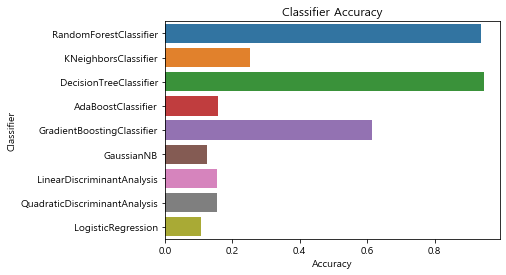

In [27]:
data={'Classifier':['RandomForestClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'GaussianNB', 'LinearDiscriminantAnalysis', 'QuadraticDiscriminantAnalysis', 'LogisticRegression'], 
      'Accuracy':[accuracy_score(y_test, fr_pred), accuracy_score(y_test, knn_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, ab_pred), accuracy_score(y_test, gb_pred), accuracy_score(y_test, nb_pred), accuracy_score(y_test, ld_pred), accuracy_score(y_test, qd_pred), accuracy_score(y_test, lr_pred)]}
lol=pd.DataFrame(data)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=lol)